In [82]:
from os.path import join
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [44]:
data_path = join('.', 'assets', "accuracies_data")

original_path = join(data_path, 'classification_report_No downsampling.csv')
darionet_path = join(data_path, 'classification_report_DarioNet.csv')

original_results = pd.read_csv(original_path, index_col=0)["f1-score"]
darionet_results = pd.read_csv(darionet_path, index_col=0)["f1-score"]


In [77]:
combined = pd.concat([original_results, darionet_results], axis=1)
combined.columns = ["f1-score-original", "f1-score-darionet"]
combined["difference"] = (original_results-darionet_results).apply(np.abs)
combined["difference_no_abs"] = original_results-darionet_results


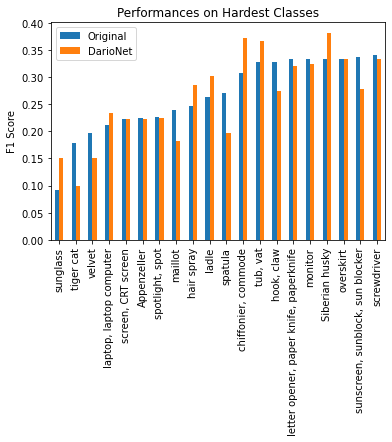

In [169]:
combined.sort_values("f1-score-original").iloc[:20].plot(y=["f1-score-original", "f1-score-darionet"], kind="bar")
plt.title("Performances on Hardest Classes")
plt.ylabel("F1 Score")
plt.legend(["Original", "DarioNet"])
plt.show()

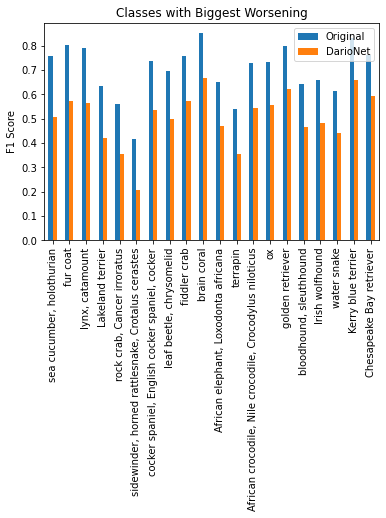

In [93]:
combined.sort_values("difference", ascending=False).iloc[:20].plot(y=["f1-score-original", "f1-score-darionet"], kind="bar")
plt.title("Classes with Biggest Worsening")
plt.ylabel("F1 Score")
plt.legend(["Original", "DarioNet"])
plt.show()

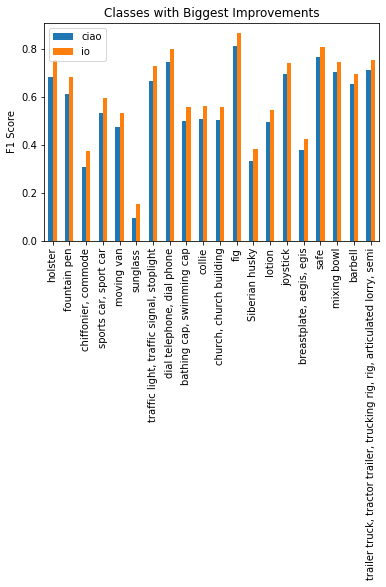

In [92]:
combined.sort_values("difference_no_abs", ascending=True).iloc[:20].plot(y=["f1-score-original", "f1-score-darionet"], kind="bar")
plt.title("Classes with Biggest Improvements")
plt.ylabel("F1 Score")
plt.legend(["Original", "DarioNet"])
plt.show()

In [132]:
from seaborn import kdeplot

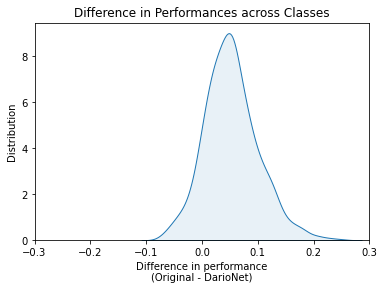

In [136]:
kdeplot(combined["difference_no_abs"], fill=True, alpha=.1)
plt.title("Difference in Performances across Classes")
plt.xlim([-0.3, 0.3])
plt.xlabel("Difference in performance\n(Original - DarioNet)")
plt.ylabel("Distribution")
plt.show()

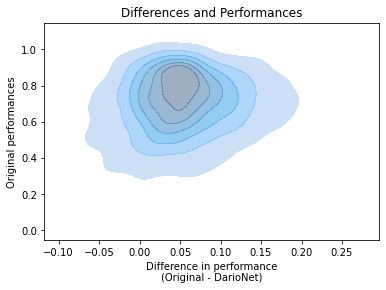

In [164]:
kdeplot(data=combined, x="difference_no_abs", y="f1-score-original", fill=True, alpha=.5, levels=7)
plt.title("Differences and Performances")
plt.xlabel("Difference in performance\n(Original - DarioNet)")
plt.ylabel("Original performances")
plt.show()